In [30]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [31]:
spark = SparkSession.builder.getOrCreate()

In [32]:
book_df = spark.read.option("inferschema", "true").csv("Books.csv", header=True)
detail_df = spark.read.option("inferschema", "true").csv("Detail.csv", header=True)
header_df = spark.read.option("inferschema", "true").csv("Header.csv", header=True)
rating_df = spark.read.option("inferschema", "true").csv("Ratings.csv", header=True)
user_df = spark.read.option("inferschema", "true").csv("Users.csv", header=True)

In [33]:
book_df.registerTempTable("book")
detail_df.registerTempTable("detail")
header_df.registerTempTable("header")
rating_df.registerTempTable("rating")
user_df.registerTempTable("user")

+-----+-----------+
|Total|Book-Rating|
+-----+-----------+
|   11|          5|
|   18|          6|
|   22|          7|
|   30|          8|
|   23|          9|
|   31|         10|
+-----+-----------+



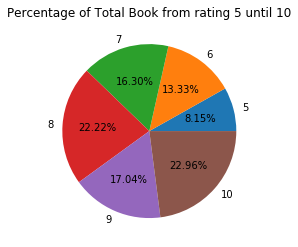

In [37]:
res1 = spark.sql("""
    SELECT COUNT(*) AS Total, `Book-Rating`
    FROM book b JOIN rating r
    ON b.`Book-ID` = r.`Book-ID`
    WHERE `Book-Rating` BETWEEN 5 AND 10
    GROUP BY `Book-Rating`
    ORDER BY `Book-Rating`
""")

res1.show()

res1 = res1.toPandas()
plt.title("Percentage of Total Book from rating 5 until 10")
plt.pie(res1["Total"], labels=res1["Book-Rating"],autopct="%.2f%%")
plt.show()

+------+-----+
|Income|Month|
+------+-----+
|  2130|  Jan|
| 11340|  Feb|
| 10960|  Mar|
|  4690|  Apr|
| 33990|  May|
| 10070|  Jun|
| 11400|  Jul|
| 16060|  Aug|
|  1970|  Sep|
|  5950|  Oct|
|  1460|  Nov|
|  3860|  Dec|
+------+-----+



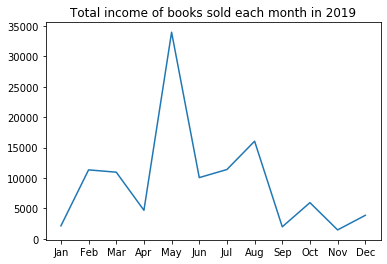

In [41]:
res2 = spark.sql("""
    SELECT SUM(`Book-Price` * Quantity) AS Income,
        DATE_FORMAT(`Transaction-Date`, 'MMM') AS Month
    FROM book b JOIN detail d
    ON b.`Book-ID` = d.`Book-ID`
    JOIN header h
    ON d.`Header-ID` = h.`Header-ID`
    WHERE YEAR(`Transaction-Date`) = 2019
    GROUP BY Month
    ORDER BY MIN(MONTH(`Transaction-Date`))
""")

res2.show()

res2 = res2.toPandas()

plt.title("Total income of books sold each month in 2019")
plt.plot(res2["Income"])
plt.xticks(range(len(res2["Month"])), res2["Month"])
plt.show()

+---------+------------+
|Frequency|UserCategory|
+---------+------------+
|        3|         Old|
|       73|       Adult|
|       48|       Child|
+---------+------------+



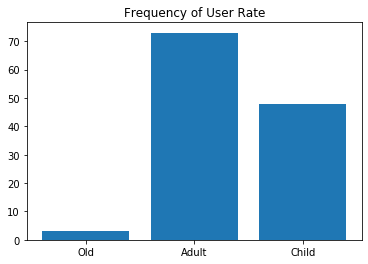

In [45]:
res3 = spark.sql("""
    SELECT COUNT(*) AS Frequency,
    CASE
    WHEN Age > 65 THEN 'Old'
    WHEN Age BETWEEN 25 AND 65 THEN 'Adult'
    WHEN Age < 25 THEN 'Child'
    END AS UserCategory
    FROM rating r JOIN user u
    ON r.`User-ID` = u.`User-ID`
    WHERE `Book-Rating` > 5
    GROUP BY UserCategory
""")

res3.show()

res3 = res3.toPandas()

plt.title("Frequency of User Rate")
plt.bar(res3["UserCategory"], res3["Frequency"])
plt.show()